<a href="https://colab.research.google.com/github/SebasLion/Simulacion_1_Sebas/blob/main/Integraci%C3%B2n_Mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de la media muestral:



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd


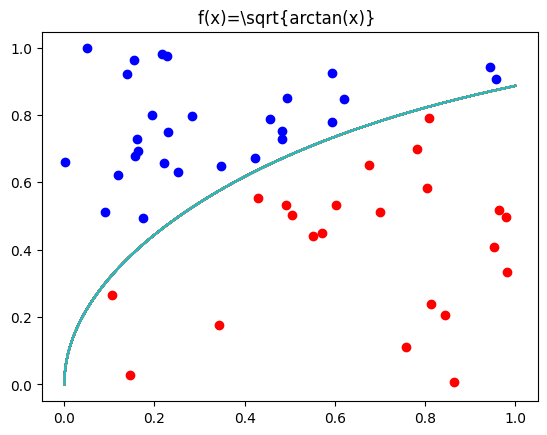

In [10]:
# Creamos una iamgen de la función para entender mejor el objetivo
x=np.linspace(0,1,1000)
for i in range(50):
  u1=rnd.random()
  u2=rnd.random()
  if u2 <= np.arctan(u1) ** 0.5:
    plt.plot(x,np.arctan(x) ** 0.5)
    plt.scatter(u1,u2, color="red")
  else:
    plt.plot(x,np.arctan(x) ** 0.5)
    plt.scatter(u1,u2, color="blue")
plt.title("f(x)=\sqrt{arctan(x)} ")
plt.show()

#Método de Monte Carlo de la Media Muestral

1. Generar una secuencia $\{U_i \}_{i=n}^n \sim U(0,1)$.

2. Calcular $x_i= a + U_i(b-a)$

3. Calcular $g(x_i)$ para $i=1, ..., n$

4. Estimar $I$ calculando la media muestral $ \theta _1$

$$\theta_1=(b-a) \frac{1}{n} ∑_{i=1}^{n} g(x_i)$$
Con $x_i \sim U(0,1)$

In [11]:
# Definimmos los valores de nuestros limites
a = 0 #limite inferior
b =  1 #limite superior

In [12]:
#Calculamos las g(x_i)
def Estimador(a,n):
  gx_i = [] #En esta lista se anexarán los valores de g(x_i)
  for i in range(n):
    u = rnd.random() #Generamos un valor aleatorio entre 0 y 1
    x = a + u*(b-a) #Calculamos x
    g = np.sqrt(np.arctan(x)) #Evaluamos x en la función
    gx_i.append(g)
  return gx_i

In [13]:
#Calculamos la suma de la de los g(x_i)
def suma_g(n):
  G = Estimador(a,n) # Llamamos a la función
  variable = 0 #Hacemos un contador
  lg_i = [] # Creamos una lista para guardar los datos
  for i in G:
    variable= variable+i # Sumamos los valores de la función "Estimador"
    lg_i.append(variable)
  return lg_i

Calculamos la aproximación que esta dada por:

$$I= \frac{1}{n} \{ g(x_1) + ... + g(x_n) \} $$

In [14]:
#Calculamos el valor de I
def I(n):
  suma_gi= suma_g(n) # Usamos la función suma
  l1 = [] # Creamos una lista para guardar los datos
  for k in suma_gi:
    i =(1/n)*(k) # Definición de "I" y su cálculo
    l1.append(i)
  return l1[-1] # Retornamos el último elemento de la lista


In [15]:
# Realizamos la simulación
def sim(N,m): # Para N experimentos con m iteraciones
  l2 = [] # Creamos una listapara guardar los datos
  for i in range(N):
    cal = I(m) # Llamamos a la función "I"
    l2.append(cal) # Agregamos el valor obtenido por la función "I"
  return l2 # Retornamos la lista de los valores obtenidos

In [16]:
G=sim(1000, 50) #Nuestro estimador para 1000 experimentos y 50 que es el tamaño de la mmuestra

Text(0.5, 1.0, 'Histograma de muestra n=50, simulado 1000 veces')

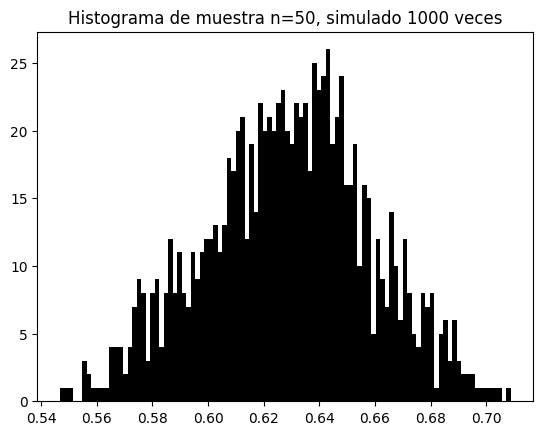

In [19]:
#Graficamos un histograma
plt.hist(G, bins=100, color="black")
plt.title("Histograma de muestra n=50, simulado 1000 veces")

In [20]:
#Calculamos la media
mu=np.mean(G)
print(mu)

0.6288445127364575


Text(0.5, 1.0, 'Simulación')

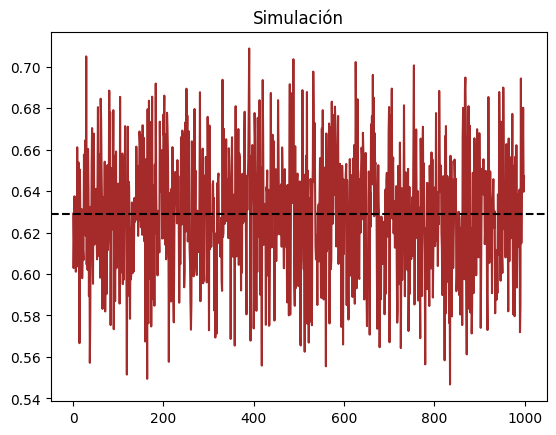

In [29]:
#Graficamos nuestra simulación
plt.plot(G, color="brown")
plt.axhline(mu, color='black', linestyle='--')
plt.title("Simulación")

In [30]:
#Estimamos nuestro \theta_1
n=50 #Tamaño de la muestra
theta_1=(b-a)*I(n)
print(theta_1)

0.520848260421249


Ahora lo resolveremos por

# **El Método  de Monte Carlo de Acierto y Error**

1. Generar una secuencia $\{U_i \}_{i=n}^{2n} \sim U(0,1)$.

2. Conformar pares $ (U_i, U_{n+i})$ para $i=1, ..., n$

3. Calcular $x_i= a + U_i(b-a)$ para $i=1, ...,n$

4. Calcular $g(x_i)$ para $i=1, ..., n$

5. Calcular los aciertos $n_a$, tales que $g(x_i)>c \cdot U_{n+i}$

6. Estimar I calculando la media muestral $\theta_2$
$$I \approx \theta_2=c \cdot (b-a) \frac{n_a}{n}$$
donde $n_a$ es el nÚmero de puntos bajo o sobre la curva, es decir, los aciertos del muestreo.
Y $c$ como algún valor que acote la función en todo el intervalo de integración,


In [31]:
#Supongamos que c es el valor máximo de función
c=1

In [32]:
# Paso 1 y 2

#Conformamos pares
def l_u(n): # Creamos una función
  l1 = []
  l2 = []
  for i in range(1, 2*n):# El rango de 1 a la 2*n

    u = rnd.random() #Número aleatorio generado entre o y 1
    if i % 2 == 0: # Generamos numero pares U_n+i
      l1.append(u)
    elif i % 2 != 0 :# Generamos números impares U_i
      l2.append(u)
  return l1, l2

In [33]:
# 3. Se evalúa en los puntos de nuestro interés

def evaluacion(n):
   Us=l_u(n)
   l_x = []
   for i in Us[1]:
    x = a + i*(b-a) #Ocupamos la lista de impares que correponde a los u_i
    l_x.append(x)
   return l_x

In [34]:
# 4. Hacemos la evalución de las x en la función

def g_xi(n):
  x = evaluacion(n) # Llamamos a la función "evaluacion"
  l3 = [] # Creamos una lista para guardar los datos
  for i in x:
    valor = np.sqrt(np.arctan(i))
    l3.append(valor)
  return l3

In [35]:
# 5. Calcular los aciertos  n_a , tales que  g(xi)>cUn+i

def aciertos(n): #Hacemos la comparación
  p = g_xi(n) #Llamamos a la funcion "g_xi"
  U=l_u(n)
  Un=U[0]
  cont = 0
  for a in range(n-1):
    if p[a]>c*Un[a]: # Creamos la condición de comparación
      cont += 1
  return cont

In [36]:
# 6. Calculamos el valor theta_2

def theta_2(n): #Calcularemos los I
  Num_aci = aciertos(n)
  l_I = []
  I = c*(b-a)*(Num_aci/n) #Se calculan los I
  l_I.append(I)
  return l_I[-1]


In [38]:
# Simulamos el experimento una _n_ veces

def sim2(r,n):
  l5 = []
  for i in range(r):
    error = theta_2(n)
    l5.append(error)
  return l5

In [39]:
S=sim2(1000,50)

Text(0.5, 1.0, 'Histograma de muestra n=50, simulado 1000 veces')

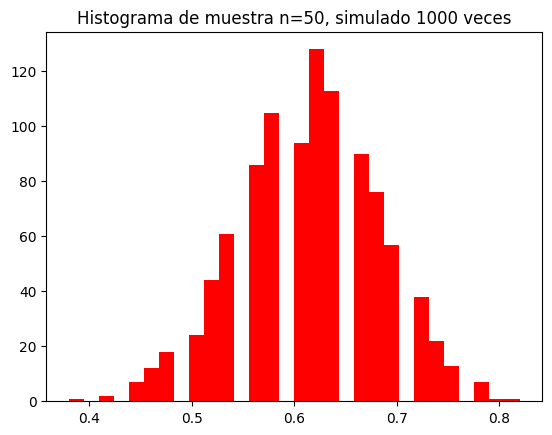

In [43]:
#Graficamos nuestro histograma
plt.hist(S, bins=30, color="red")
plt.title("Histograma de muestra n=50, simulado 1000 veces")

In [41]:
#Calculamos la media
mu2=np.mean(S)
print(mu2)

0.615


Text(0.5, 1.0, 'Simulación')

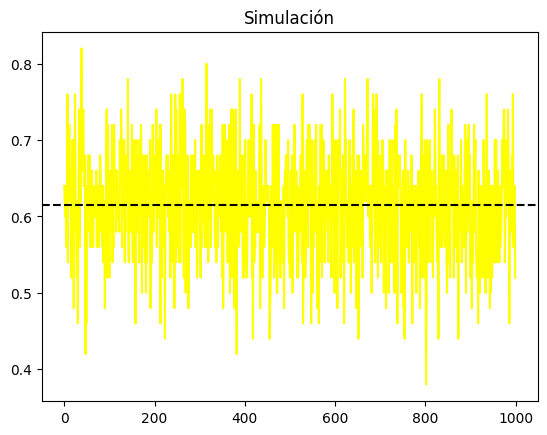

In [42]:
#Graficamos nuestra simulación
plt.plot(S, color="yellow")
plt.axhline(mu2, color='black', linestyle='--')
plt.title("Simulación")

In [44]:
#Comparamos las medias
print('Media Muestral', mu)
print('Acierto y Error', mu2)

Media Muestral 0.6288445127364575
Acierto y Error 0.615
